In [3]:
from IPython.display import HTML
file_path = 'directmethods.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from numpy.linalg import cond, solve, norm
from scipy.linalg import hilbert



def test_matrix(A):
    # Compute the right-hand side of the linear system
    n = A.shape[0]
    x_true = np.ones((n,1))
    b = A @ x_true
    # Compute the condition number in 2-norm, inf-norm of the matrix A.
    cond_2norm = np.linalg.cond(A,2)
    cond_infnorm = np.linalg.cond(A,np.Inf)
    # Solve the linear system 
    x_computed = np.linalg.solve(A,b)
    # Compute the relative error
    rel_err = np.linalg.norm(x_computed - x_true) / np.linalg.norm(x_true)

    return {
        'cond_2norm': cond_2norm,
        'cond_infnorm': cond_infnorm,
        'relative_error': rel_err,
        'x_computed': x_computed
    }



def collect_results(n_values,matrix_generator_method):
    results = []
    for n in n_values:
        A = matrix_generator_method(n)
        results.append(test_matrix(A))

    df_results = pd.DataFrame(results,index=n_values)
    df_results.index.name = 'n'
    df_results.columns = ['Cond. Number (2-norm)', 'Cond. Number (Inf-norm)', 'Relative Error','Computed Solution']

    return df_results


def plot_results(df_results):
    n_values = df_results.index
    cond_2norm = df_results['Cond. Number (2-norm)']
    cond_infnorm = df_results['Cond. Number (Inf-norm)']
    relative_errors = df_results['Relative Error']

    from IPython.display import display
    display(df_results)

    plt.figure(figsize=(14, 7))

    # Plot condition numbers
    plt.subplot(1, 2, 1)
    plt.plot(n_values, cond_2norm, marker='o', label='2-norm')
    plt.plot(n_values, cond_infnorm, marker='x', label='Inf-norm')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Condition Number')
    plt.title('Condition Numbers by Matrix Size')
    plt.legend()
    plt.grid(True)

    # Plot relative errors
    plt.subplot(1, 2, 2)
    plt.plot(n_values, relative_errors, marker='o', color='red')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Relative Error')
    plt.title('Relative Errors by Matrix Size')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    



In [33]:
from IPython.display import HTML
file_path = 'testdirect.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

,Cond. Number (2-norm),Cond. Number (Inf-norm),Relative Error,Computed Solution
n,,,,
10,85.766618,141.925093,1.012070e-15,"[[0.9999999999999999], [0.9999999999999996], [..."
20,11750.350311,29119.317151,3.838414e-13,"[[1.0000000000001623], [0.9999999999991982], [..."
30,440.307471,1249.804004,5.325677e-15,"[[1.0000000000000049], [1.0000000000000038], [..."
40,448.784440,900.665440,3.925270e-15,"[[1.0000000000000058], [1.0000000000000007], [..."
50,2007.339627,5214.071053,4.205441e-14,"[[0.9999999999999966], [1.00000000000002], [0...."
60,716.121847,1908.829057,9.661811e-15,"[[1.0000000000000109], [1.000000000000005], [0..."
70,1589.520678,4312.269202,7.890965e-14,"[[1.0000000000000087], [0.9999999999999969], [..."
80,1233.162145,2929.912525,1.060461e-14,"[[0.9999999999999762], [0.9999999999999921], [..."
90,3859.945692,11784.094892,1.590374e-13,"[[0.9999999999999262], [1.0000000000000717], [..."


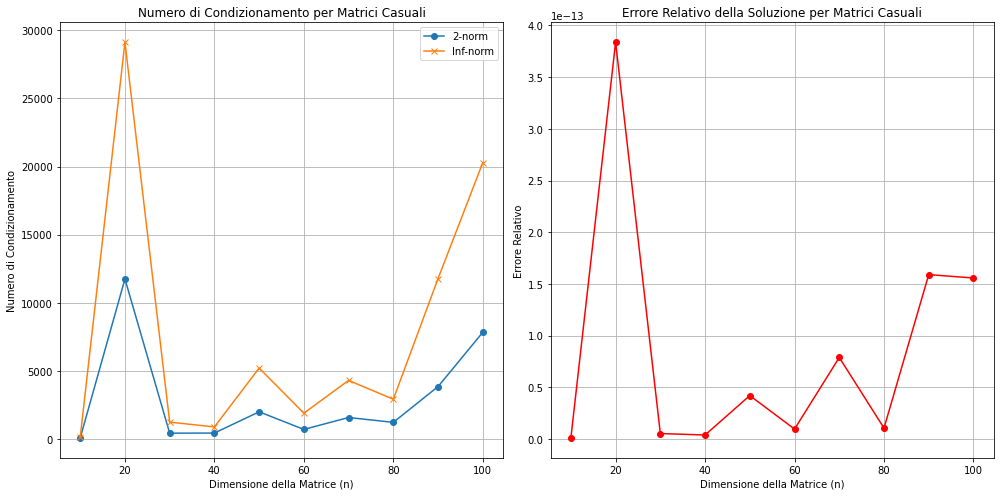

In [25]:
# Generate a random matrix A, knowing that the chance of it being singular is practically zero for random floats
import pandas as pd 


n_values_random = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
results_random = []

for n in n_values_random:
    A_random = np.random.rand(n,n)
    result = test_matrix(A_random)
    results_random.append(result)

# Creiamo un DataFrame per visualizzare i risultati in una tabella
df_results_random = pd.DataFrame(results_random, index=n_values_random)
df_results_random.index.name = 'n'
df_results_random.columns = ['Cond. Number (2-norm)', 'Cond. Number (Inf-norm)', 'Relative Error','Computed Solution']

# Mostra la tabella dei risultati
from IPython.display import display

display(df_results_random)
import matplotlib.pyplot as plt

# Estraiamo i dati dalle liste dei risultati
cond_2norm_random = df_results_random['Cond. Number (2-norm)']
cond_infnorm_random = df_results_random['Cond. Number (Inf-norm)']
relative_errors_random = df_results_random['Relative Error']

# Creiamo grafici per mostrare i numeri di condizionamento e gli errori relativi
plt.figure(figsize=(14, 7))

# Grafico per il numero di condizionamento in norma-2
plt.subplot(1, 2, 1)
plt.plot(n_values_random, cond_2norm_random, marker='o', label='2-norm')
plt.plot(n_values_random, cond_infnorm_random, marker='x', label='Inf-norm')
plt.xlabel('Dimensione della Matrice (n)')
plt.ylabel('Numero di Condizionamento')
plt.title('Numero di Condizionamento per Matrici Casuali')
plt.legend()
plt.grid(True)

# Grafico per l'errore relativo
plt.subplot(1, 2, 2)
plt.plot(n_values_random, relative_errors_random, marker='o', color='red')
plt.xlabel('Dimensione della Matrice (n)')
plt.ylabel('Errore Relativo')
plt.title('Errore Relativo della Soluzione per Matrici Casuali')
plt.grid(True)

plt.tight_layout()
plt.show()






In [37]:
def generate_random_matrix(n):
    return np.random.rand(n,n)

n_values_random = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,500,1000,100000]
df_results_random = collect_results(n_values_random,generate_random_matrix)
plot_results(df_results_random)


